In [ ]:
import numpy as np
import pandas as pd
import keras
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense,Dropout,Conv2D,Conv1D,Flatten,MaxPool2D
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import recall_score
from sklearn.metrics import *
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

#PRE-PROCESSING THE DATA

In [ ]:
def my_sdp_preprocessor(datafilename_as_csv_inquotes):
    original_data = pd.read_csv(datafilename_as_csv_inquotes)
    original_data.isnull().values.any() #Gives false ie:No null value in dataset
    original_data = original_data.fillna(value=False)
    original_X = pd.DataFrame(original_data.drop(['defects'],axis=1))
    original_Y = original_data['defects']
    original_Y = pd.DataFrame(original_Y)
    x_train1, x_test, y_train1, y_test= train_test_split(original_X, original_Y, test_size = .1,
                                                              random_state=12)

    #now we resample, and from that we take training and validation sets
    sm = SMOTE(random_state=12, ratio = 1.0)
    x, y = sm.fit_sample(x_train1, y_train1)
    y_train2 = pd.DataFrame(y, columns=['defects'])
    x_train2 = pd.DataFrame(x, columns=original_X.columns)
    
    
    x_train, x_val, y_train, y_val= train_test_split(x_train2, y_train2, test_size = .1,
                                                              random_state=12)
    combined_training_data = x_train.copy()
    combined_training_data['defects'] = y_train
    corr = combined_training_data.corr()
    plt.figure(figsize=(12,6))
    sns.heatmap(corr)
    plt.show()
    #sns.heatmap(corr, xticklabels=corr.columns,yticklabels=corr.columns)
    return original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val 

#Neural Network Model

In [ ]:
def NN(original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val):   
  # Initialising the ANN
    classifier = Sequential()
    
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(15, kernel_initializer='glorot_uniform', activation = 'relu', input_dim = len(original_X.columns)))
    # Adding the second hidden layer
    classifier.add(Dense(8, kernel_initializer='glorot_uniform', activation = 'relu'))
    classifier.add(Dense(5, kernel_initializer='glorot_uniform', activation = 'relu'))
    # Adding the output layer
    classifier.add(Dense(1, kernel_initializer='glorot_uniform', activation = 'sigmoid'))
    # Compiling the ANN
    
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    # Fitting the ANN to the Training set
    classifier.fit(x_train, y_train, batch_size = 10, epochs = 100)
    
    #Making the predictions and evaluating the model
    # Predicting the Test set results
    y_pred = classifier.predict(x_val)
    y_pred = (y_pred > 0.5)
    y_pred = pd.DataFrame(y_pred, columns=['defects'])
    # Making the Confusion Matrix
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_val, y_pred)
    from sklearn.metrics import accuracy_score
    accuracy_score(y_val, y_pred)
    
    return classifier



#Naive Bayes

In [ ]:
def naive_bayes(original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val):

  clf = GaussianNB()
  clf.fit(x_train, y_train)
  return clf

#KNN

In [ ]:
def knn(original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val):

  clf = KNeighborsClassifier(n_neighbors=3)
  clf.fit(x_train, y_train)
  return clf

#DecisionTree Classifier

In [ ]:
def decision_tree(original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val):

  clf = DecisionTreeClassifier()
  clf.fit(x_train, y_train)
  return clf

#Random Forest

In [ ]:
def random_forest(original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val):

  clf = RandomForestClassifier(n_estimators=100, max_depth=5,random_state=0)
  clf.fit(x_train, y_train)
  return clf

#SVM

In [ ]:
def svm(original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val):
    clf = SVC(gamma='auto')
    clf.fit(x_train, y_train)
    return clf

#Perceptron

In [ ]:
def perceptron(original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val):

  clf = Perceptron()
  clf.fit(x_train, y_train)
  return clf

#MLP Classifier

In [ ]:
def MLP_Classifier(original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val):

  clf = MLPClassifier(hidden_layer_sizes=(150,100,50),max_iter=300,activation = 'relu',solver='adam',random_state=1)
  clf.fit(x_train, y_train)
  return clf

#CNN(Convolutional Neural Network)

In [ ]:
def cnn(original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val):
    
    #create model
    
    x_train_matrix = x_train.values
    x_val_matrix = x_val.values
    y_train_matrix = y_train.values
    y_val_matrix = y_val.values
    
    ytrainseries = y_train['defects']
    #y_train_onehot = pd.get_dummies(ytrainseries)
    yvalseries = y_val['defects']
    #y_val_onehot = pd.get_dummies(yvalseries)
    
    img_rows, img_cols = 1,len(original_X.columns)
    
    x_train1 = x_train_matrix.reshape(x_train_matrix.shape[0], img_rows, img_cols, 1)
    x_val1 = x_val_matrix.reshape(x_val_matrix.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

    model = Sequential()
    #add model layers
    model.add(Conv2D(64, kernel_size=1, activation='relu',input_shape=input_shape))
    model.add(Conv2D(32, kernel_size=1, activation='relu'))
    model.add(Conv2D(16, kernel_size=1, activation='relu'))
    
    
#   model.add(MaxPool2D(pool_size=(1,8)))
    #model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model using accuracy to measure model performance
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    #train the model
    model.fit(x_train1, y_train_matrix, epochs=40)    
    y_pred = model.predict(x_val1)>0.5
    y_pred_df = pd.DataFrame(y_pred)
    
    return model         

#Fine tuning the parameters with GridSearchCV

##MLP classifier with GridSearchCV


In [ ]:
def MLP_Classifier_GridSearch(original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val):

  mlp = MLPClassifier(max_iter=100)
  parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
  }

  clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3)
  clf.fit(x_train, y_train)
  return clf


##Random Forest with GridSearchCv

In [ ]:
def random_forest_GridSearch(original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val):

  forest = RandomForestClassifier(random_state = 1)
  n_estimators = [100, 300, 500, 800, 1200]
  max_depth = [5, 8, 15, 25, 30]
  min_samples_split = [2, 5, 10, 15, 100]
  min_samples_leaf = [1, 2, 5, 10] 

  hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

  gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
  bestF = gridF.fit(x_train, y_train)
  return bestF

##KNN with GridSearchCV

In [ ]:
def knn_GridSearch(original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val):
  grid_params = {'n_neighbors':[3,5,11,19],
               'weights':['uniform','distance'],
               'metric':['euclidean','manhattan']  
  }
  kn = KNeighborsClassifier()
  gs = GridSearchCV(kn,grid_params,verbose=1,cv=3,n_jobs=-1)
  gs.fit(x_train,y_train)
  return gs

##Decision Tree with GridSearchCV

In [ ]:
def decision_tree_GridSearch(original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val):
  depth_range = range(1, 10)
  leaf_range = range(1,15)
  param_grid = dict(max_depth=depth_range, min_samples_leaf=leaf_range) 
  decision_tree = DecisionTreeClassifier()
  gs = GridSearchCV(decision_tree,param_grid,verbose=1,cv=3,n_jobs=-1)
  gs.fit(x_train,y_train)
  return gs

#Metrics Evaluation

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


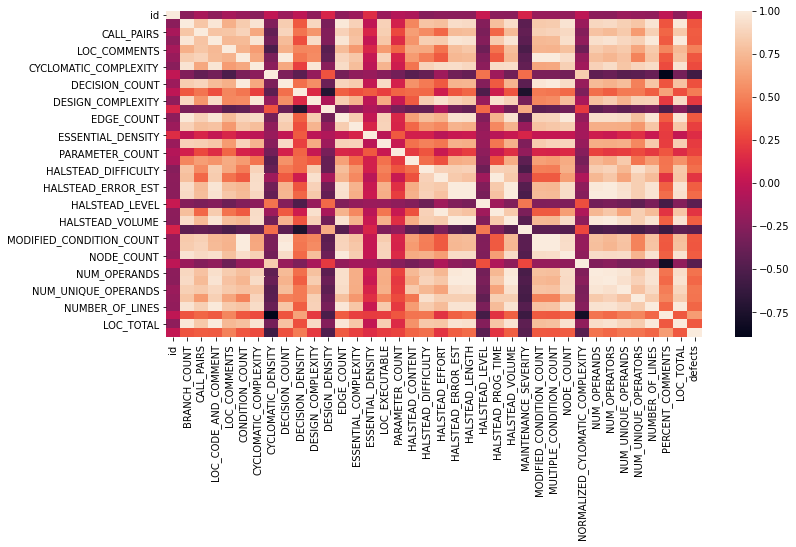

Epoch 1/40
282/282 [==============================] - 1s 3ms/step - loss: 10.7274 - accuracy: 0.7952
Epoch 2/40
282/282 [==============================] - 1s 3ms/step - loss: 4.7173 - accuracy: 0.8120
Epoch 3/40
282/282 [==============================] - 1s 3ms/step - loss: 4.0247 - accuracy: 0.8299
Epoch 4/40
282/282 [==============================] - 1s 3ms/step - loss: 2.2269 - accuracy: 0.8400
Epoch 5/40
282/282 [==============================] - 1s 3ms/step - loss: 0.9107 - accuracy: 0.8748
Epoch 6/40
282/282 [==============================] - 1s 3ms/step - loss: 1.0783 - accuracy: 0.8792
Epoch 7/40
282/282 [==============================] - 1s 3ms/step - loss: 0.6018 - accuracy: 0.9056
Epoch 8/40
282/282 [==============================] - 1s 3ms/step - loss: 0.5654 - accuracy: 0.9120
Epoch 9/40
282/282 [==============================] - 1s 3ms/step - loss: 1.1511 - accuracy: 0.8917
Epoch 10/40
282/282 [==============================] - 1s 3ms/step - loss: 0.4788 - accuracy: 0.937

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Epoch 1/100
902/902 [==============================] - 1s 1ms/step - loss: 12.3001 - accuracy: 0.5092
Epoch 2/100
902/902 [==============================] - 1s 1ms/step - loss: 0.6934 - accuracy: 0.4994
Epoch 3/100
902/902 [==============================] - 1s 1ms/step - loss: 0.6933 - accuracy: 0.4979
Epoch 4/100
902/902 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.4999
Epoch 5/100
902/902 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.4996
Epoch 6/100
902/902 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.4976
Epoch 7/100
902/902 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.4996
Epoch 8/100
902/902 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.4916
Epoch 9/100
902/902 [==============================] - 1s 1ms/step - loss: 0.6932 - accuracy: 0.4976
Epoch 10/100
902/902 [==============================] - 1s 1ms/step - loss: 0.6932 - accur

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

****** SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) ******
||Validation Set||
Accuracy: 0.6726546906187625
Avg Precision: 0.6716680923866553
f1_score: 0.5147928994082841
Precision: 0.9942857142857143
Recall: 0.3473053892215569
ROC_AUC: 0.6726546906187625
||Test Set||
Accuracy: 0.5
Avg Precision: 0.0017889087656529517
f1_score: 0.0
Precision: 0.0
Recall: 0.0
ROC_AUC: 0.5
****** RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


****** <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f4282850c50> ******
||Validation Set||
Accuracy: 0.5
Avg Precision: 0.5
f1_score: 0.6666666666666666
Precision: 0.5
Recall: 1.0
ROC_AUC: 0.5
||Test Set||
Accuracy: 0.5
Avg Precision: 0.0017889087656529517
f1_score: 0.0035714285714285718
Precision: 0.0017889087656529517
Recall: 1.0
ROC_AUC: 0.5
****** <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f428b1a34a8> ******
||Validation Set||
Accuracy: 0.9920159680638723
Avg Precision: 0.9842829076620825
f1_score: 0.9920792079207921
Precision: 0.9842829076620825
Recall: 1.0
ROC_AUC: 0.9920159680638723
||Test Set||
Accuracy: 0.4874551971326165
Avg Precision: 0.0017889087656529517
f1_score: 0.0
Precision: 0.0
Recall: 0.0
ROC_AUC: 0.4874551971326165
****** GaussianNB(priors=None, var_smoothing=1e-09) ******
||Validation Set||
Accuracy: 0.7015968063872255
Avg Precision: 0.6925158691625757
f1_score: 0.5864453665283541
Precision: 0.954954954954955
Recall: 0

In [ ]:
data = 'pc2.csv'
original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val = my_sdp_preprocessor(data)
all_data = [original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val]


cnn_clf = cnn(*all_data) 
svm_clf = svm(*all_data)
rf_clf = random_forest(*all_data)
nn_clf = NN(*all_data)
naive_bayes = naive_bayes(*all_data)
decision_tree = decision_tree(*all_data)
perceptron = perceptron(*all_data)
mlp = MLP_Classifier(*all_data)
knn = knn(*all_data)


def print_accuracy(model): #nn,cnn,svm,clf,nb,mlp,knn,des,per
    if (model == nn_clf):
        y_pred_on_val = model.predict(x_val)>0.5
        y_pred_on_test = model.predict(x_test)>0.5
    elif (model == cnn_clf):
        x_val_matrix = x_val.values
        x_val1 = x_val_matrix.reshape(x_val_matrix.shape[0], 1, len(x_val.columns), 1)
        y_pred_on_val = model.predict(x_val1)>0.5
        x_test_matrix = x_test.values
        x_test1 = x_test_matrix.reshape(x_test_matrix.shape[0], 1, len(x_test.columns), 1)
        y_pred_on_test = model.predict(x_test1)>0.5
    else:
        y_pred_on_val = model.predict(x_val)
        y_pred_on_test = model.predict(x_test)
        
    print('******', str(model), '******')   
    print('||Validation Set||')
    print('Accuracy:',balanced_accuracy_score(y_val,y_pred_on_val))
    print('Avg Precision:', average_precision_score(y_val,y_pred_on_val))
    print('f1_score:', f1_score(y_val,y_pred_on_val))
    print('Precision:', precision_score(y_val,y_pred_on_val))
    print('Recall:', recall_score(y_val, y_pred_on_val))
    print('ROC_AUC:',roc_auc_score(y_val,y_pred_on_val))
    print('||Test Set||')
    print('Accuracy:',balanced_accuracy_score(y_test,y_pred_on_test))
    print('Avg Precision:', average_precision_score(y_test,y_pred_on_test))
    print('f1_score:', f1_score(y_test,y_pred_on_test))
    print('Precision:', precision_score(y_test,y_pred_on_test))
    print('Recall:', recall_score(y_test, y_pred_on_test))
    print('ROC_AUC:',roc_auc_score(y_test,y_pred_on_test))
    y_pred_on_val_df = pd.DataFrame(y_pred_on_val, columns=['defects1'])
    y_pred_on_test_df = pd.DataFrame(y_pred_on_test, columns=['defects1'])
    val_result = pd.concat([y_val['defects'].reset_index(drop=True), y_pred_on_val_df['defects1']],axis=1)
    val_result = val_result.rename(columns={'defects':'val_actual', 'defects1':'val_predict'})
    test_result = pd.concat([y_test['defects'].reset_index(drop=True),y_pred_on_test_df['defects1']],axis=1)
    test_result = test_result.rename(columns={'defects':'test_actual','defects1':'test_predict'})
    return val_result, test_result


svm_val_result, svm_test_result = print_accuracy(svm_clf)
rf_val_result, rf_test_result = print_accuracy(rf_clf)
nn_val_result, nn_test_result = print_accuracy(nn_clf)
cnn_val_result, cnn_test_result = print_accuracy(cnn_clf)
naive_val_result, naive_test_result = print_accuracy(naive_bayes)
knn_val_result, knn_test_result = print_accuracy(knn)
decision_val_result, decision_test_result = print_accuracy(decision_tree)
perceptron_val_result, perceptron_test_result = print_accuracy(perceptron)
mlp_val_result, mlp_test_result = print_accuracy(mlp)


new_val_set_x = pd.concat([svm_val_result['val_predict'],rf_val_result['val_predict'],nn_val_result['val_predict'],cnn_val_result['val_predict'],naive_val_result['val_predict'],knn_val_result['val_predict'],decision_val_result['val_predict'],perceptron_val_result['val_predict'],mlp_val_result['val_predict']],axis=1)
new_val_set_x_matrix = new_val_set_x.values
new_val_set_y_matrix = svm_val_result['val_actual'].values

new_test_set_x = pd.concat([svm_test_result['test_predict'],rf_test_result['test_predict'],nn_test_result['test_predict'],cnn_test_result['test_predict'],naive_test_result['test_predict'],knn_test_result['test_predict'],decision_test_result['test_predict'],perceptron_test_result['test_predict'],mlp_test_result['test_predict'] ],axis=1)
new_test_set_x_matrix = new_test_set_x.values
new_test_set_y_matrix = svm_test_result['test_actual'].values

def send_classifiers_to_LR_file():
    return nn_clf, cnn_clf, svm_clf, rf_clf,naive_bayes,knn,decision_tree,perceptron,mlp

from sklearn.linear_model import LogisticRegression
def send_results_to_logistic_regression():
    clf = LogisticRegression(random_state=0)
    clf.fit(new_val_set_x_matrix, new_val_set_y_matrix)
    #yyy = clf.predict(new_test_set_x_matrix)
    #accuracy_score(y_test.values,yyy)
    return clf, new_test_set_x_matrix


##Logistic Regression

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


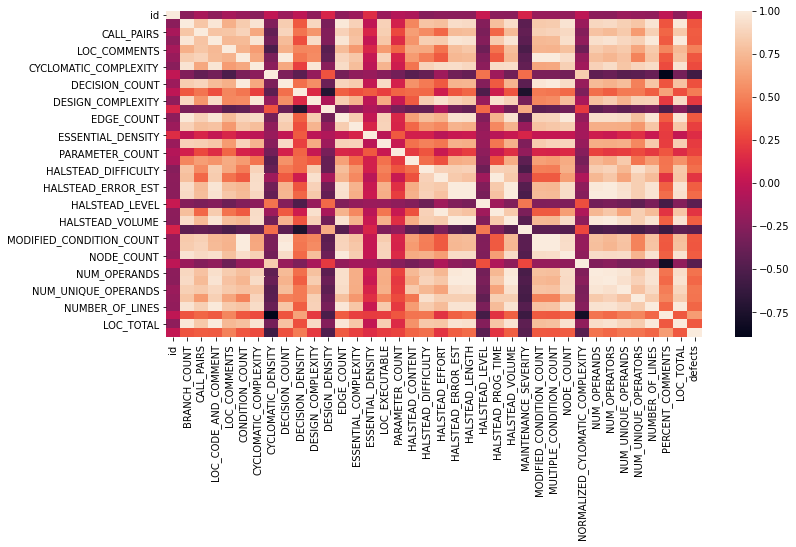

Accuracy: 0.9838998211091234


In [ ]:
data = 'pc2.csv'
original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val = my_sdp_preprocessor(data)
all_data = [original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val]

nn_clf, cnn_clf, svm_clf, rf_clf,naive_bayes,knn,decision_tree,perceptron,mlp = send_classifiers_to_LR_file()
log_reg_clf, new_test_set_x_matrix = send_results_to_logistic_regression()

prediction = log_reg_clf.predict(new_test_set_x_matrix)
print('Accuracy:',accuracy_score(y_test.values,prediction))


##Metrics Evaluation after fine tuning the parameters

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


Fitting 3 folds for each of 500 candidates, totalling 1500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 13.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 34.9min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed: 75.3min
[Parallel(n_jobs=-1)]: Done 1246 tasks      | elapsed: 134.5min
[Parallel(n_jobs=-1)]: Done 1500 out of 1500 | elapsed: 168.0min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


Fitting 3 folds for each of 16 candidates, totalling 48 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 out of  48 | elapsed:    4.9s finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.


Fitting 3 folds for each of 126 candidates, totalling 378 fits


[Parallel(n_jobs=-1)]: Done 164 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 378 out of 378 | elapsed:   21.5s finished
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


****** GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=1,
                            

(      val_actual  val_predict
 0          False        False
 1           True         True
 2          False         True
 3          False        False
 4           True         True
 ...          ...          ...
 997         True         True
 998         True         True
 999        False        False
 1000        True         True
 1001       False         True
 
 [1002 rows x 2 columns],      test_actual  test_predict
 0          False         False
 1          False         False
 2          False         False
 3          False          True
 4          False         False
 ..           ...           ...
 554        False         False
 555        False         False
 556        False         False
 557        False         False
 558        False          True
 
 [559 rows x 2 columns])

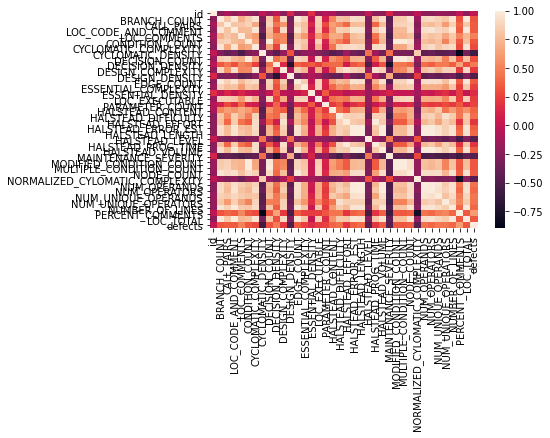

In [ ]:
data = 'pc2.csv'
original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val = my_sdp_preprocessor(data)
all_data = [original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val]
rnd_grid = random_forest_GridSearch(*all_data)
knn_grid = knn_GridSearch(*all_data)
decision_tree_grid = decision_tree_GridSearch(*all_data)
mlp_grid = MLP_Classifier_GridSearch(*all_data)

def print_accuracy(model): 
    y_pred_on_val = model.predict(x_val)
    y_pred_on_test = model.predict(x_test)
    print('******', str(model), '******')   
    print('||Validation Set||')
    print('Accuracy:',balanced_accuracy_score(y_val,y_pred_on_val))
    print('Avg Precision:', average_precision_score(y_val,y_pred_on_val))
    print('f1_score:', f1_score(y_val,y_pred_on_val))
    print('Precision:', precision_score(y_val,y_pred_on_val))
    print('Recall:', recall_score(y_val, y_pred_on_val))
    print('ROC_AUC:',roc_auc_score(y_val,y_pred_on_val))
    print('||Test Set||')
    print('Accuracy:',balanced_accuracy_score(y_test,y_pred_on_test))
    print('Avg Precision:', average_precision_score(y_test,y_pred_on_test))
    print('f1_score:', f1_score(y_test,y_pred_on_test))
    print('Precision:', precision_score(y_test,y_pred_on_test))
    print('Recall:', recall_score(y_test, y_pred_on_test))
    print('ROC_AUC:',roc_auc_score(y_test,y_pred_on_test))
    y_pred_on_val_df = pd.DataFrame(y_pred_on_val, columns=['defects1'])
    y_pred_on_test_df = pd.DataFrame(y_pred_on_test, columns=['defects1'])
    val_result = pd.concat([y_val['defects'].reset_index(drop=True), y_pred_on_val_df['defects1']],axis=1)
    val_result = val_result.rename(columns={'defects':'val_actual', 'defects1':'val_predict'})
    test_result = pd.concat([y_test['defects'].reset_index(drop=True),y_pred_on_test_df['defects1']],axis=1)
    test_result = test_result.rename(columns={'defects':'test_actual','defects1':'test_predict'})
    return val_result, test_result

print_accuracy(rnd_grid)
print_accuracy(knn_grid)
print_accuracy(decision_tree_grid)
print_accuracy(mlp_grid)







##ENSEMBLE LEARNING

##AdaBoost Classifier

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for examp

0.969490538967543


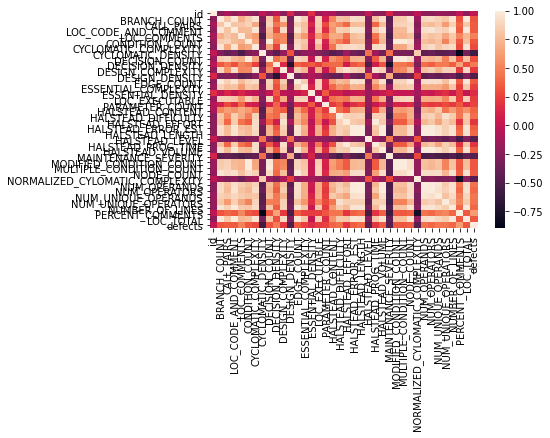

In [ ]:
data = 'pc2.csv'
original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val = my_sdp_preprocessor(data)
all_data = [original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val]

def adaBoost_classifier(original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val):
  seed = 7
  num_trees = 30
  kfold = model_selection.KFold(n_splits=10, random_state=seed)
  model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
  results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold)
  print(results.mean())
adaBoost_classifier(*all_data)


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


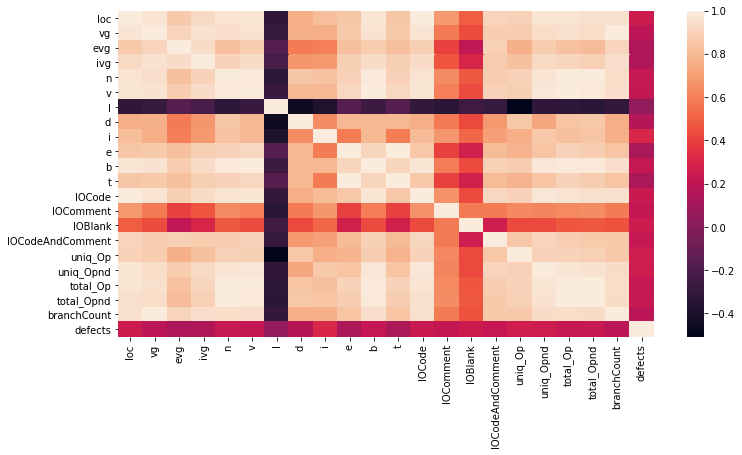

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

****** SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) ******
||Validation Set||
Accuracy: 0.5986842105263157
Avg Precision: 0.4969400244798042
f1_score: 0.6545454545454545
Precision: 0.5
Recall: 0.9473684210526315
ROC_AUC: 0.5986842105263157
||Test Set||
Accuracy: 0.6956521739130435
Avg Precision: 0.24324324324324326
f1_score: 0.391304347826087
Precision: 0.24324324324324326
Recall: 1.0
ROC_AUC: 0.6956521739130435
****** RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       m

In [ ]:
data = 'pc1.csv'
original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val = my_sdp_preprocessor(data)
all_data = [original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val]


#cnn_clf = cnn(*all_data) 
svm_clf = svm(*all_data)
rf_clf = random_forest(*all_data)
#nn_clf = NN(*all_data)
naive_bayes = naive_bayes(*all_data)
decision_tree = decision_tree(*all_data)
perceptron = perceptron(*all_data)
mlp = MLP_Classifier(*all_data)
knn = knn(*all_data)


def print_accuracy(model): #nn,cnn,svm,clf,nb,mlp,knn,des,per
    if (model == nn_clf):
        y_pred_on_val = model.predict(x_val)>0.5
        y_pred_on_test = model.predict(x_test)>0.5
    elif (model == cnn_clf):
        x_val_matrix = x_val.values
        x_val1 = x_val_matrix.reshape(x_val_matrix.shape[0], 1, len(x_val.columns), 1)
        y_pred_on_val = model.predict(x_val1)>0.5
        x_test_matrix = x_test.values
        x_test1 = x_test_matrix.reshape(x_test_matrix.shape[0], 1, len(x_test.columns), 1)
        y_pred_on_test = model.predict(x_test1)>0.5
    else:
        y_pred_on_val = model.predict(x_val)
        y_pred_on_test = model.predict(x_test)
        
    print('******', str(model), '******')   
    print('||Validation Set||')
    print('Accuracy:',balanced_accuracy_score(y_val,y_pred_on_val))
    print('Avg Precision:', average_precision_score(y_val,y_pred_on_val))
    print('f1_score:', f1_score(y_val,y_pred_on_val))
    print('Precision:', precision_score(y_val,y_pred_on_val))
    print('Recall:', recall_score(y_val, y_pred_on_val))
    print('ROC_AUC:',roc_auc_score(y_val,y_pred_on_val))
    print('||Test Set||')
    print('Accuracy:',balanced_accuracy_score(y_test,y_pred_on_test))
    print('Avg Precision:', average_precision_score(y_test,y_pred_on_test))
    print('f1_score:', f1_score(y_test,y_pred_on_test))
    print('Precision:', precision_score(y_test,y_pred_on_test))
    print('Recall:', recall_score(y_test, y_pred_on_test))
    print('ROC_AUC:',roc_auc_score(y_test,y_pred_on_test))
    y_pred_on_val_df = pd.DataFrame(y_pred_on_val, columns=['defects1'])
    y_pred_on_test_df = pd.DataFrame(y_pred_on_test, columns=['defects1'])
    val_result = pd.concat([y_val['defects'].reset_index(drop=True), y_pred_on_val_df['defects1']],axis=1)
    val_result = val_result.rename(columns={'defects':'val_actual', 'defects1':'val_predict'})
    test_result = pd.concat([y_test['defects'].reset_index(drop=True),y_pred_on_test_df['defects1']],axis=1)
    test_result = test_result.rename(columns={'defects':'test_actual','defects1':'test_predict'})
    return val_result, test_result


svm_val_result, svm_test_result = print_accuracy(svm_clf)
rf_val_result, rf_test_result = print_accuracy(rf_clf)
#nn_val_result, nn_test_result = print_accuracy(nn_clf)
#cnn_val_result, cnn_test_result = print_accuracy(cnn_clf)
naive_val_result, naive_test_result = print_accuracy(naive_bayes)
knn_val_result, knn_test_result = print_accuracy(knn)
decision_val_result, decision_test_result = print_accuracy(decision_tree)
perceptron_val_result, perceptron_test_result = print_accuracy(perceptron)
mlp_val_result, mlp_test_result = print_accuracy(mlp)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


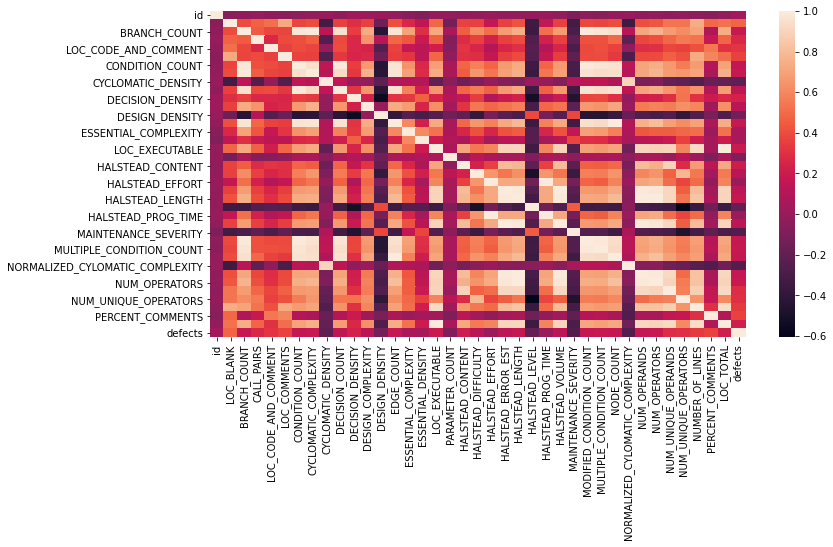

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

****** SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) ******
||Validation Set||
Accuracy: 0.5753968253968254
Avg Precision: 0.5753968253968254
f1_score: 0.2620689655172414
Precision: 1.0
Recall: 0.15079365079365079
ROC_AUC: 0.5753968253968254
||Test Set||
Accuracy: 0.5
Avg Precision: 0.08280254777070063
f1_score: 0.0
Precision: 0.0
Recall: 0.0
ROC_AUC: 0.5
****** RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
            

In [ ]:
data = 'pc3.csv'
original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val = my_sdp_preprocessor(data)
all_data = [original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val]


#cnn_clf = cnn(*all_data) 
svm_clf = svm(*all_data)
rf_clf = random_forest(*all_data)
#nn_clf = NN(*all_data)
naive_bayes = naive_bayes(*all_data)
decision_tree = decision_tree(*all_data)
perceptron = perceptron(*all_data)
mlp = MLP_Classifier(*all_data)
knn = knn(*all_data)


def print_accuracy(model): #nn,cnn,svm,clf,nb,mlp,knn,des,per
    if (model == nn_clf):
        y_pred_on_val = model.predict(x_val)>0.5
        y_pred_on_test = model.predict(x_test)>0.5
    elif (model == cnn_clf):
        x_val_matrix = x_val.values
        x_val1 = x_val_matrix.reshape(x_val_matrix.shape[0], 1, len(x_val.columns), 1)
        y_pred_on_val = model.predict(x_val1)>0.5
        x_test_matrix = x_test.values
        x_test1 = x_test_matrix.reshape(x_test_matrix.shape[0], 1, len(x_test.columns), 1)
        y_pred_on_test = model.predict(x_test1)>0.5
    else:
        y_pred_on_val = model.predict(x_val)
        y_pred_on_test = model.predict(x_test)
        
    print('******', str(model), '******')   
    print('||Validation Set||')
    print('Accuracy:',balanced_accuracy_score(y_val,y_pred_on_val))
    print('Avg Precision:', average_precision_score(y_val,y_pred_on_val))
    print('f1_score:', f1_score(y_val,y_pred_on_val))
    print('Precision:', precision_score(y_val,y_pred_on_val))
    print('Recall:', recall_score(y_val, y_pred_on_val))
    print('ROC_AUC:',roc_auc_score(y_val,y_pred_on_val))
    print('||Test Set||')
    print('Accuracy:',balanced_accuracy_score(y_test,y_pred_on_test))
    print('Avg Precision:', average_precision_score(y_test,y_pred_on_test))
    print('f1_score:', f1_score(y_test,y_pred_on_test))
    print('Precision:', precision_score(y_test,y_pred_on_test))
    print('Recall:', recall_score(y_test, y_pred_on_test))
    print('ROC_AUC:',roc_auc_score(y_test,y_pred_on_test))
    y_pred_on_val_df = pd.DataFrame(y_pred_on_val, columns=['defects1'])
    y_pred_on_test_df = pd.DataFrame(y_pred_on_test, columns=['defects1'])
    val_result = pd.concat([y_val['defects'].reset_index(drop=True), y_pred_on_val_df['defects1']],axis=1)
    val_result = val_result.rename(columns={'defects':'val_actual', 'defects1':'val_predict'})
    test_result = pd.concat([y_test['defects'].reset_index(drop=True),y_pred_on_test_df['defects1']],axis=1)
    test_result = test_result.rename(columns={'defects':'test_actual','defects1':'test_predict'})
    return val_result, test_result


svm_val_result, svm_test_result = print_accuracy(svm_clf)
rf_val_result, rf_test_result = print_accuracy(rf_clf)
#nn_val_result, nn_test_result = print_accuracy(nn_clf)
#cnn_val_result, cnn_test_result = print_accuracy(cnn_clf)
naive_val_result, naive_test_result = print_accuracy(naive_bayes)
knn_val_result, knn_test_result = print_accuracy(knn)
decision_val_result, decision_test_result = print_accuracy(decision_tree)
perceptron_val_result, perceptron_test_result = print_accuracy(perceptron)
mlp_val_result, mlp_test_result = print_accuracy(mlp)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


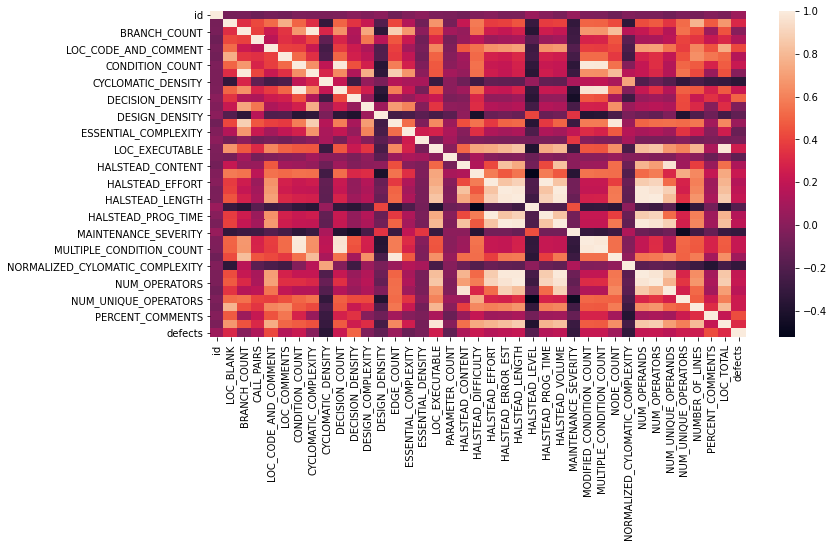

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

****** SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) ******
||Validation Set||
Accuracy: 0.5521739130434783
Avg Precision: 0.5521739130434783
f1_score: 0.18897637795275588
Precision: 1.0
Recall: 0.10434782608695652
ROC_AUC: 0.5521739130434783
||Test Set||
Accuracy: 0.5
Avg Precision: 0.08904109589041095
f1_score: 0.0
Precision: 0.0
Recall: 0.0
ROC_AUC: 0.5
****** RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
           

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
data = 'pc4.csv'
original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val = my_sdp_preprocessor(data)
all_data = [original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val]


#cnn_clf = cnn(*all_data) 
svm_clf = svm(*all_data)
rf_clf = random_forest(*all_data)
#nn_clf = NN(*all_data)
naive_bayes = naive_bayes(*all_data)
decision_tree = decision_tree(*all_data)
perceptron = perceptron(*all_data)
mlp = MLP_Classifier(*all_data)
knn = knn(*all_data)


def print_accuracy(model): #nn,cnn,svm,clf,nb,mlp,knn,des,per
    if (model == nn_clf):
        y_pred_on_val = model.predict(x_val)>0.5
        y_pred_on_test = model.predict(x_test)>0.5
    elif (model == cnn_clf):
        x_val_matrix = x_val.values
        x_val1 = x_val_matrix.reshape(x_val_matrix.shape[0], 1, len(x_val.columns), 1)
        y_pred_on_val = model.predict(x_val1)>0.5
        x_test_matrix = x_test.values
        x_test1 = x_test_matrix.reshape(x_test_matrix.shape[0], 1, len(x_test.columns), 1)
        y_pred_on_test = model.predict(x_test1)>0.5
    else:
        y_pred_on_val = model.predict(x_val)
        y_pred_on_test = model.predict(x_test)
        
    print('******', str(model), '******')   
    print('||Validation Set||')
    print('Accuracy:',balanced_accuracy_score(y_val,y_pred_on_val))
    print('Avg Precision:', average_precision_score(y_val,y_pred_on_val))
    print('f1_score:', f1_score(y_val,y_pred_on_val))
    print('Precision:', precision_score(y_val,y_pred_on_val))
    print('Recall:', recall_score(y_val, y_pred_on_val))
    print('ROC_AUC:',roc_auc_score(y_val,y_pred_on_val))
    print('||Test Set||')
    print('Accuracy:',balanced_accuracy_score(y_test,y_pred_on_test))
    print('Avg Precision:', average_precision_score(y_test,y_pred_on_test))
    print('f1_score:', f1_score(y_test,y_pred_on_test))
    print('Precision:', precision_score(y_test,y_pred_on_test))
    print('Recall:', recall_score(y_test, y_pred_on_test))
    print('ROC_AUC:',roc_auc_score(y_test,y_pred_on_test))
    y_pred_on_val_df = pd.DataFrame(y_pred_on_val, columns=['defects1'])
    y_pred_on_test_df = pd.DataFrame(y_pred_on_test, columns=['defects1'])
    val_result = pd.concat([y_val['defects'].reset_index(drop=True), y_pred_on_val_df['defects1']],axis=1)
    val_result = val_result.rename(columns={'defects':'val_actual', 'defects1':'val_predict'})
    test_result = pd.concat([y_test['defects'].reset_index(drop=True),y_pred_on_test_df['defects1']],axis=1)
    test_result = test_result.rename(columns={'defects':'test_actual','defects1':'test_predict'})
    return val_result, test_result


svm_val_result, svm_test_result = print_accuracy(svm_clf)
rf_val_result, rf_test_result = print_accuracy(rf_clf)
#nn_val_result, nn_test_result = print_accuracy(nn_clf)
#cnn_val_result, cnn_test_result = print_accuracy(cnn_clf)
naive_val_result, naive_test_result = print_accuracy(naive_bayes)
knn_val_result, knn_test_result = print_accuracy(knn)
decision_val_result, decision_test_result = print_accuracy(decision_tree)
perceptron_val_result, perceptron_test_result = print_accuracy(perceptron)
mlp_val_result, mlp_test_result = print_accuracy(mlp)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


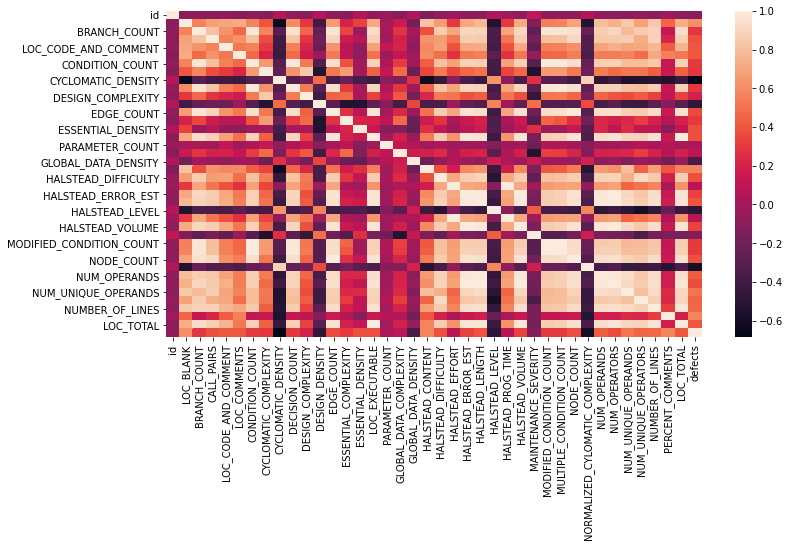

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

****** SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) ******
||Validation Set||
Accuracy: 0.7648845686512757
Avg Precision: 0.7584925415578707
f1_score: 0.6926131850675139
Precision: 1.0
Recall: 0.5297691373025516
ROC_AUC: 0.7648845686512757
||Test Set||
Accuracy: 0.5625
Avg Precision: 0.13239176346356918
f1_score: 0.2222222222222222
Precision: 1.0
Recall: 0.125
ROC_AUC: 0.5625
****** RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estima

In [ ]:
data = 'mc1.csv'
original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val = my_sdp_preprocessor(data)
all_data = [original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val]


#cnn_clf = cnn(*all_data) 
svm_clf = svm(*all_data)
rf_clf = random_forest(*all_data)
#nn_clf = NN(*all_data)
naive_bayes = naive_bayes(*all_data)
decision_tree = decision_tree(*all_data)
perceptron = perceptron(*all_data)
mlp = MLP_Classifier(*all_data)
knn = knn(*all_data)


def print_accuracy(model): #nn,cnn,svm,clf,nb,mlp,knn,des,per
    if (model == nn_clf):
        y_pred_on_val = model.predict(x_val)>0.5
        y_pred_on_test = model.predict(x_test)>0.5
    elif (model == cnn_clf):
        x_val_matrix = x_val.values
        x_val1 = x_val_matrix.reshape(x_val_matrix.shape[0], 1, len(x_val.columns), 1)
        y_pred_on_val = model.predict(x_val1)>0.5
        x_test_matrix = x_test.values
        x_test1 = x_test_matrix.reshape(x_test_matrix.shape[0], 1, len(x_test.columns), 1)
        y_pred_on_test = model.predict(x_test1)>0.5
    else:
        y_pred_on_val = model.predict(x_val)
        y_pred_on_test = model.predict(x_test)
        
    print('******', str(model), '******')   
    print('||Validation Set||')
    print('Accuracy:',balanced_accuracy_score(y_val,y_pred_on_val))
    print('Avg Precision:', average_precision_score(y_val,y_pred_on_val))
    print('f1_score:', f1_score(y_val,y_pred_on_val))
    print('Precision:', precision_score(y_val,y_pred_on_val))
    print('Recall:', recall_score(y_val, y_pred_on_val))
    print('ROC_AUC:',roc_auc_score(y_val,y_pred_on_val))
    print('||Test Set||')
    print('Accuracy:',balanced_accuracy_score(y_test,y_pred_on_test))
    print('Avg Precision:', average_precision_score(y_test,y_pred_on_test))
    print('f1_score:', f1_score(y_test,y_pred_on_test))
    print('Precision:', precision_score(y_test,y_pred_on_test))
    print('Recall:', recall_score(y_test, y_pred_on_test))
    print('ROC_AUC:',roc_auc_score(y_test,y_pred_on_test))
    y_pred_on_val_df = pd.DataFrame(y_pred_on_val, columns=['defects1'])
    y_pred_on_test_df = pd.DataFrame(y_pred_on_test, columns=['defects1'])
    val_result = pd.concat([y_val['defects'].reset_index(drop=True), y_pred_on_val_df['defects1']],axis=1)
    val_result = val_result.rename(columns={'defects':'val_actual', 'defects1':'val_predict'})
    test_result = pd.concat([y_test['defects'].reset_index(drop=True),y_pred_on_test_df['defects1']],axis=1)
    test_result = test_result.rename(columns={'defects':'test_actual','defects1':'test_predict'})
    return val_result, test_result


svm_val_result, svm_test_result = print_accuracy(svm_clf)
rf_val_result, rf_test_result = print_accuracy(rf_clf)
#nn_val_result, nn_test_result = print_accuracy(nn_clf)
#cnn_val_result, cnn_test_result = print_accuracy(cnn_clf)
naive_val_result, naive_test_result = print_accuracy(naive_bayes)
knn_val_result, knn_test_result = print_accuracy(knn)
decision_val_result, decision_test_result = print_accuracy(decision_tree)
perceptron_val_result, perceptron_test_result = print_accuracy(perceptron)
mlp_val_result, mlp_test_result = print_accuracy(mlp)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


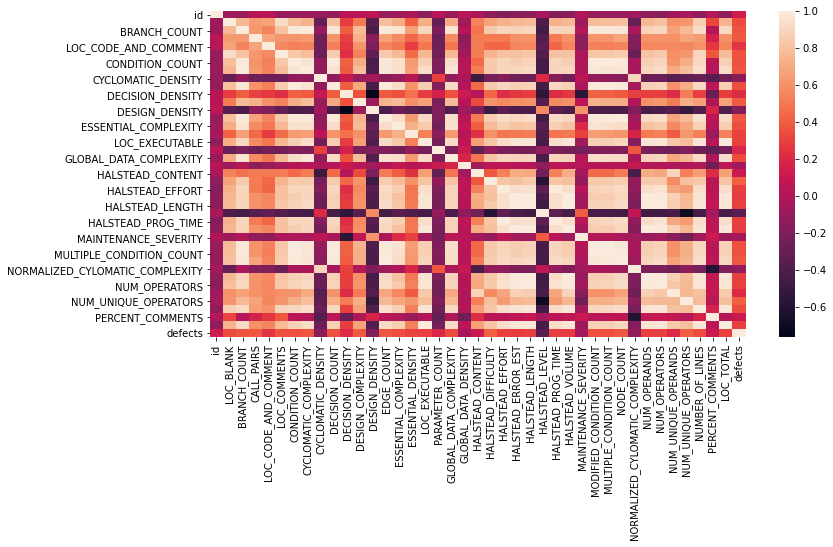

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

****** SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) ******
||Validation Set||
Accuracy: 0.5454545454545454
Avg Precision: 0.5
f1_score: 0.6666666666666666
Precision: 0.5
Recall: 1.0
ROC_AUC: 0.5454545454545454
||Test Set||
Accuracy: 0.5
Avg Precision: 0.5294117647058824
f1_score: 0.6923076923076924
Precision: 0.5294117647058824
Recall: 1.0
ROC_AUC: 0.5
****** RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
              

In [ ]:
data = 'mc2.csv'
original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val = my_sdp_preprocessor(data)
all_data = [original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val]


#cnn_clf = cnn(*all_data) 
svm_clf = svm(*all_data)
rf_clf = random_forest(*all_data)
#nn_clf = NN(*all_data)
naive_bayes = naive_bayes(*all_data)
decision_tree = decision_tree(*all_data)
perceptron = perceptron(*all_data)
mlp = MLP_Classifier(*all_data)
knn = knn(*all_data)


def print_accuracy(model): #nn,cnn,svm,clf,nb,mlp,knn,des,per
    if (model == nn_clf):
        y_pred_on_val = model.predict(x_val)>0.5
        y_pred_on_test = model.predict(x_test)>0.5
    elif (model == cnn_clf):
        x_val_matrix = x_val.values
        x_val1 = x_val_matrix.reshape(x_val_matrix.shape[0], 1, len(x_val.columns), 1)
        y_pred_on_val = model.predict(x_val1)>0.5
        x_test_matrix = x_test.values
        x_test1 = x_test_matrix.reshape(x_test_matrix.shape[0], 1, len(x_test.columns), 1)
        y_pred_on_test = model.predict(x_test1)>0.5
    else:
        y_pred_on_val = model.predict(x_val)
        y_pred_on_test = model.predict(x_test)
        
    print('******', str(model), '******')   
    print('||Validation Set||')
    print('Accuracy:',balanced_accuracy_score(y_val,y_pred_on_val))
    print('Avg Precision:', average_precision_score(y_val,y_pred_on_val))
    print('f1_score:', f1_score(y_val,y_pred_on_val))
    print('Precision:', precision_score(y_val,y_pred_on_val))
    print('Recall:', recall_score(y_val, y_pred_on_val))
    print('ROC_AUC:',roc_auc_score(y_val,y_pred_on_val))
    print('||Test Set||')
    print('Accuracy:',balanced_accuracy_score(y_test,y_pred_on_test))
    print('Avg Precision:', average_precision_score(y_test,y_pred_on_test))
    print('f1_score:', f1_score(y_test,y_pred_on_test))
    print('Precision:', precision_score(y_test,y_pred_on_test))
    print('Recall:', recall_score(y_test, y_pred_on_test))
    print('ROC_AUC:',roc_auc_score(y_test,y_pred_on_test))
    y_pred_on_val_df = pd.DataFrame(y_pred_on_val, columns=['defects1'])
    y_pred_on_test_df = pd.DataFrame(y_pred_on_test, columns=['defects1'])
    val_result = pd.concat([y_val['defects'].reset_index(drop=True), y_pred_on_val_df['defects1']],axis=1)
    val_result = val_result.rename(columns={'defects':'val_actual', 'defects1':'val_predict'})
    test_result = pd.concat([y_test['defects'].reset_index(drop=True),y_pred_on_test_df['defects1']],axis=1)
    test_result = test_result.rename(columns={'defects':'test_actual','defects1':'test_predict'})
    return val_result, test_result


svm_val_result, svm_test_result = print_accuracy(svm_clf)
rf_val_result, rf_test_result = print_accuracy(rf_clf)
#nn_val_result, nn_test_result = print_accuracy(nn_clf)
#cnn_val_result, cnn_test_result = print_accuracy(cnn_clf)
naive_val_result, naive_test_result = print_accuracy(naive_bayes)
knn_val_result, knn_test_result = print_accuracy(knn)
decision_val_result, decision_test_result = print_accuracy(decision_tree)
perceptron_val_result, perceptron_test_result = print_accuracy(perceptron)
mlp_val_result, mlp_test_result = print_accuracy(mlp)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


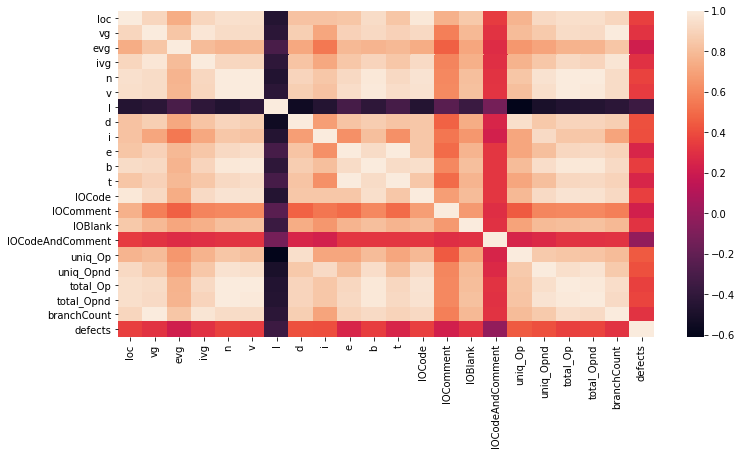

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

****** SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) ******
||Validation Set||
Accuracy: 0.8414549919422915
Avg Precision: 0.7724626775738344
f1_score: 0.8663101604278075
Precision: 0.7788461538461539
Recall: 0.9759036144578314
ROC_AUC: 0.8414549919422916
||Test Set||
Accuracy: 0.7498509242695289
Avg Precision: 0.3261561277810432
f1_score: 0.4963503649635037
Precision: 0.3469387755102041
Recall: 0.8717948717948718
ROC_AUC: 0.7498509242695289
****** RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_spli

In [ ]:
data = 'kc1.csv'
original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val = my_sdp_preprocessor(data)
all_data = [original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val]


#cnn_clf = cnn(*all_data) 
svm_clf = svm(*all_data)
rf_clf = random_forest(*all_data)
#nn_clf = NN(*all_data)
naive_bayes = naive_bayes(*all_data)
decision_tree = decision_tree(*all_data)
perceptron = perceptron(*all_data)
mlp = MLP_Classifier(*all_data)
knn = knn(*all_data)


def print_accuracy(model): #nn,cnn,svm,clf,nb,mlp,knn,des,per
    if (model == nn_clf):
        y_pred_on_val = model.predict(x_val)>0.5
        y_pred_on_test = model.predict(x_test)>0.5
    elif (model == cnn_clf):
        x_val_matrix = x_val.values
        x_val1 = x_val_matrix.reshape(x_val_matrix.shape[0], 1, len(x_val.columns), 1)
        y_pred_on_val = model.predict(x_val1)>0.5
        x_test_matrix = x_test.values
        x_test1 = x_test_matrix.reshape(x_test_matrix.shape[0], 1, len(x_test.columns), 1)
        y_pred_on_test = model.predict(x_test1)>0.5
    else:
        y_pred_on_val = model.predict(x_val)
        y_pred_on_test = model.predict(x_test)
        
    print('******', str(model), '******')   
    print('||Validation Set||')
    print('Accuracy:',balanced_accuracy_score(y_val,y_pred_on_val))
    print('Avg Precision:', average_precision_score(y_val,y_pred_on_val))
    print('f1_score:', f1_score(y_val,y_pred_on_val))
    print('Precision:', precision_score(y_val,y_pred_on_val))
    print('Recall:', recall_score(y_val, y_pred_on_val))
    print('ROC_AUC:',roc_auc_score(y_val,y_pred_on_val))
    print('||Test Set||')
    print('Accuracy:',balanced_accuracy_score(y_test,y_pred_on_test))
    print('Avg Precision:', average_precision_score(y_test,y_pred_on_test))
    print('f1_score:', f1_score(y_test,y_pred_on_test))
    print('Precision:', precision_score(y_test,y_pred_on_test))
    print('Recall:', recall_score(y_test, y_pred_on_test))
    print('ROC_AUC:',roc_auc_score(y_test,y_pred_on_test))
    y_pred_on_val_df = pd.DataFrame(y_pred_on_val, columns=['defects1'])
    y_pred_on_test_df = pd.DataFrame(y_pred_on_test, columns=['defects1'])
    val_result = pd.concat([y_val['defects'].reset_index(drop=True), y_pred_on_val_df['defects1']],axis=1)
    val_result = val_result.rename(columns={'defects':'val_actual', 'defects1':'val_predict'})
    test_result = pd.concat([y_test['defects'].reset_index(drop=True),y_pred_on_test_df['defects1']],axis=1)
    test_result = test_result.rename(columns={'defects':'test_actual','defects1':'test_predict'})
    return val_result, test_result


svm_val_result, svm_test_result = print_accuracy(svm_clf)
rf_val_result, rf_test_result = print_accuracy(rf_clf)
#nn_val_result, nn_test_result = print_accuracy(nn_clf)
#cnn_val_result, cnn_test_result = print_accuracy(cnn_clf)
naive_val_result, naive_test_result = print_accuracy(naive_bayes)
knn_val_result, knn_test_result = print_accuracy(knn)
decision_val_result, decision_test_result = print_accuracy(decision_tree)
perceptron_val_result, perceptron_test_result = print_accuracy(perceptron)
mlp_val_result, mlp_test_result = print_accuracy(mlp)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


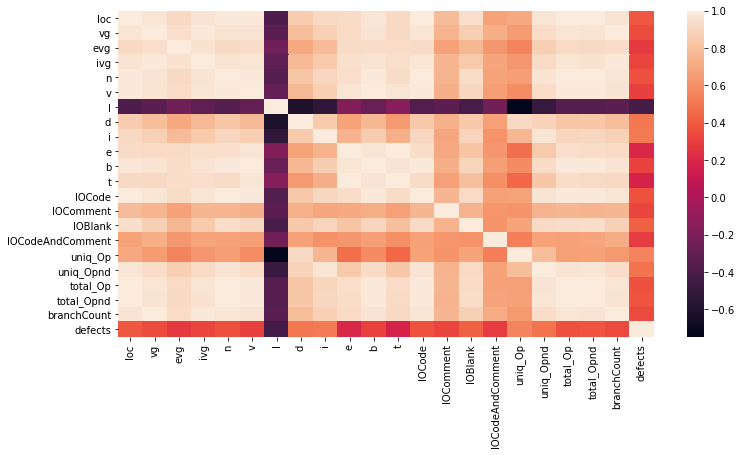

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

****** SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) ******
||Validation Set||
Accuracy: 0.669296987087518
Avg Precision: 0.6472329688814129
f1_score: 0.7676767676767676
Precision: 0.6551724137931034
Recall: 0.926829268292683
ROC_AUC: 0.669296987087518
||Test Set||
Accuracy: 0.7613636363636364
Avg Precision: 0.3
f1_score: 0.4615384615384615
Precision: 0.3
Recall: 1.0
ROC_AUC: 0.7613636363636364
****** RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_

In [ ]:
data = 'kc2.csv'
original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val = my_sdp_preprocessor(data)
all_data = [original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val]


#cnn_clf = cnn(*all_data) 
svm_clf = svm(*all_data)
rf_clf = random_forest(*all_data)
#nn_clf = NN(*all_data)
naive_bayes = naive_bayes(*all_data)
decision_tree = decision_tree(*all_data)
perceptron = perceptron(*all_data)
mlp = MLP_Classifier(*all_data)
knn = knn(*all_data)


def print_accuracy(model): #nn,cnn,svm,clf,nb,mlp,knn,des,per
    if (model == nn_clf):
        y_pred_on_val = model.predict(x_val)>0.5
        y_pred_on_test = model.predict(x_test)>0.5
    elif (model == cnn_clf):
        x_val_matrix = x_val.values
        x_val1 = x_val_matrix.reshape(x_val_matrix.shape[0], 1, len(x_val.columns), 1)
        y_pred_on_val = model.predict(x_val1)>0.5
        x_test_matrix = x_test.values
        x_test1 = x_test_matrix.reshape(x_test_matrix.shape[0], 1, len(x_test.columns), 1)
        y_pred_on_test = model.predict(x_test1)>0.5
    else:
        y_pred_on_val = model.predict(x_val)
        y_pred_on_test = model.predict(x_test)
        
    print('******', str(model), '******')   
    print('||Validation Set||')
    print('Accuracy:',balanced_accuracy_score(y_val,y_pred_on_val))
    print('Avg Precision:', average_precision_score(y_val,y_pred_on_val))
    print('f1_score:', f1_score(y_val,y_pred_on_val))
    print('Precision:', precision_score(y_val,y_pred_on_val))
    print('Recall:', recall_score(y_val, y_pred_on_val))
    print('ROC_AUC:',roc_auc_score(y_val,y_pred_on_val))
    print('||Test Set||')
    print('Accuracy:',balanced_accuracy_score(y_test,y_pred_on_test))
    print('Avg Precision:', average_precision_score(y_test,y_pred_on_test))
    print('f1_score:', f1_score(y_test,y_pred_on_test))
    print('Precision:', precision_score(y_test,y_pred_on_test))
    print('Recall:', recall_score(y_test, y_pred_on_test))
    print('ROC_AUC:',roc_auc_score(y_test,y_pred_on_test))
    y_pred_on_val_df = pd.DataFrame(y_pred_on_val, columns=['defects1'])
    y_pred_on_test_df = pd.DataFrame(y_pred_on_test, columns=['defects1'])
    val_result = pd.concat([y_val['defects'].reset_index(drop=True), y_pred_on_val_df['defects1']],axis=1)
    val_result = val_result.rename(columns={'defects':'val_actual', 'defects1':'val_predict'})
    test_result = pd.concat([y_test['defects'].reset_index(drop=True),y_pred_on_test_df['defects1']],axis=1)
    test_result = test_result.rename(columns={'defects':'test_actual','defects1':'test_predict'})
    return val_result, test_result


svm_val_result, svm_test_result = print_accuracy(svm_clf)
rf_val_result, rf_test_result = print_accuracy(rf_clf)
#nn_val_result, nn_test_result = print_accuracy(nn_clf)
#cnn_val_result, cnn_test_result = print_accuracy(cnn_clf)
naive_val_result, naive_test_result = print_accuracy(naive_bayes)
knn_val_result, knn_test_result = print_accuracy(knn)
decision_val_result, decision_test_result = print_accuracy(decision_tree)
perceptron_val_result, perceptron_test_result = print_accuracy(perceptron)
mlp_val_result, mlp_test_result = print_accuracy(mlp)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


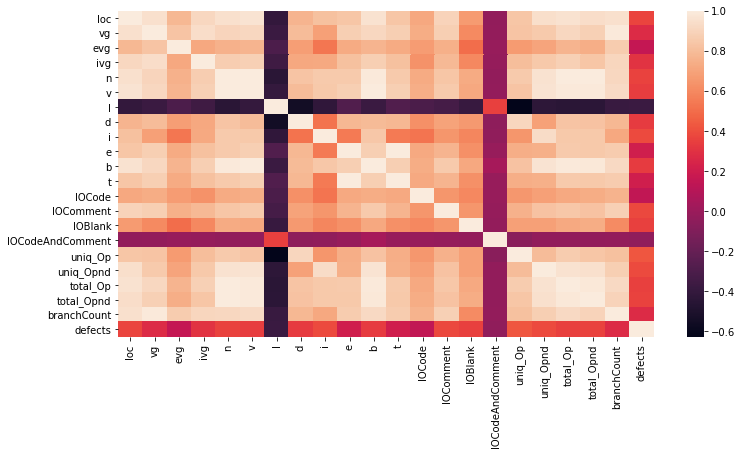

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

****** SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) ******
||Validation Set||
Accuracy: 0.645933014354067
Avg Precision: 0.5499013277642596
f1_score: 0.7047619047619047
Precision: 0.5522388059701493
Recall: 0.9736842105263158
ROC_AUC: 0.6459330143540671
||Test Set||
Accuracy: 0.529810298102981
Avg Precision: 0.18931216931216932
f1_score: 0.3137254901960784
Precision: 0.19047619047619047
Recall: 0.8888888888888888
ROC_AUC: 0.5298102981029811
****** RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_spli

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined a

In [ ]:
data = 'cm1.csv'
original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val = my_sdp_preprocessor(data)
all_data = [original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val]


#cnn_clf = cnn(*all_data) 
svm_clf = svm(*all_data)
rf_clf = random_forest(*all_data)
#nn_clf = NN(*all_data)
naive_bayes = naive_bayes(*all_data)
decision_tree = decision_tree(*all_data)
perceptron = perceptron(*all_data)
mlp = MLP_Classifier(*all_data)
knn = knn(*all_data)


def print_accuracy(model): #nn,cnn,svm,clf,nb,mlp,knn,des,per
    if (model == nn_clf):
        y_pred_on_val = model.predict(x_val)>0.5
        y_pred_on_test = model.predict(x_test)>0.5
    elif (model == cnn_clf):
        x_val_matrix = x_val.values
        x_val1 = x_val_matrix.reshape(x_val_matrix.shape[0], 1, len(x_val.columns), 1)
        y_pred_on_val = model.predict(x_val1)>0.5
        x_test_matrix = x_test.values
        x_test1 = x_test_matrix.reshape(x_test_matrix.shape[0], 1, len(x_test.columns), 1)
        y_pred_on_test = model.predict(x_test1)>0.5
    else:
        y_pred_on_val = model.predict(x_val)
        y_pred_on_test = model.predict(x_test)
        
    print('******', str(model), '******')   
    print('||Validation Set||')
    print('Accuracy:',balanced_accuracy_score(y_val,y_pred_on_val))
    print('Avg Precision:', average_precision_score(y_val,y_pred_on_val))
    print('f1_score:', f1_score(y_val,y_pred_on_val))
    print('Precision:', precision_score(y_val,y_pred_on_val))
    print('Recall:', recall_score(y_val, y_pred_on_val))
    print('ROC_AUC:',roc_auc_score(y_val,y_pred_on_val))
    print('||Test Set||')
    print('Accuracy:',balanced_accuracy_score(y_test,y_pred_on_test))
    print('Avg Precision:', average_precision_score(y_test,y_pred_on_test))
    print('f1_score:', f1_score(y_test,y_pred_on_test))
    print('Precision:', precision_score(y_test,y_pred_on_test))
    print('Recall:', recall_score(y_test, y_pred_on_test))
    print('ROC_AUC:',roc_auc_score(y_test,y_pred_on_test))
    y_pred_on_val_df = pd.DataFrame(y_pred_on_val, columns=['defects1'])
    y_pred_on_test_df = pd.DataFrame(y_pred_on_test, columns=['defects1'])
    val_result = pd.concat([y_val['defects'].reset_index(drop=True), y_pred_on_val_df['defects1']],axis=1)
    val_result = val_result.rename(columns={'defects':'val_actual', 'defects1':'val_predict'})
    test_result = pd.concat([y_test['defects'].reset_index(drop=True),y_pred_on_test_df['defects1']],axis=1)
    test_result = test_result.rename(columns={'defects':'test_actual','defects1':'test_predict'})
    return val_result, test_result


svm_val_result, svm_test_result = print_accuracy(svm_clf)
rf_val_result, rf_test_result = print_accuracy(rf_clf)
#nn_val_result, nn_test_result = print_accuracy(nn_clf)
#cnn_val_result, cnn_test_result = print_accuracy(cnn_clf)
naive_val_result, naive_test_result = print_accuracy(naive_bayes)
knn_val_result, knn_test_result = print_accuracy(knn)
decision_val_result, decision_test_result = print_accuracy(decision_tree)
perceptron_val_result, perceptron_test_result = print_accuracy(perceptron)
mlp_val_result, mlp_test_result = print_accuracy(mlp)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


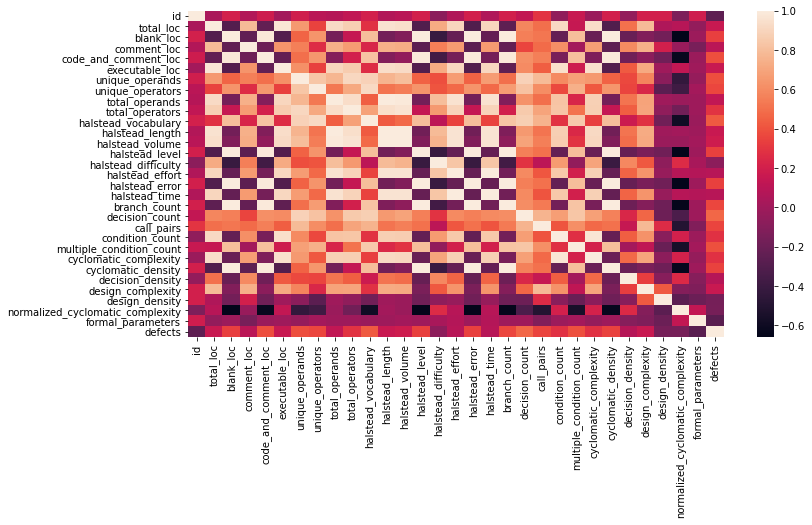

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

****** SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) ******
||Validation Set||
Accuracy: 0.5
Avg Precision: 0.625
f1_score: 0.7692307692307693
Precision: 0.625
Recall: 1.0
ROC_AUC: 0.5
||Test Set||
Accuracy: 0.5555555555555556
Avg Precision: 0.2
f1_score: 0.33333333333333337
Precision: 0.2
Recall: 1.0
ROC_AUC: 0.5555555555555556
****** RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
data = 'ar6.csv'
original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val = my_sdp_preprocessor(data)
all_data = [original_data, original_X, original_Y,combined_training_data,x_train1,x_train2,x_train,x_test,x_val,y_train1,y_train2,y_train,y_test,y_val]


#cnn_clf = cnn(*all_data) 
svm_clf = svm(*all_data)
rf_clf = random_forest(*all_data)
#nn_clf = NN(*all_data)
naive_bayes = naive_bayes(*all_data)
decision_tree = decision_tree(*all_data)
perceptron = perceptron(*all_data)
mlp = MLP_Classifier(*all_data)
knn = knn(*all_data)


def print_accuracy(model): #nn,cnn,svm,clf,nb,mlp,knn,des,per
    if (model == nn_clf):
        y_pred_on_val = model.predict(x_val)>0.5
        y_pred_on_test = model.predict(x_test)>0.5
    elif (model == cnn_clf):
        x_val_matrix = x_val.values
        x_val1 = x_val_matrix.reshape(x_val_matrix.shape[0], 1, len(x_val.columns), 1)
        y_pred_on_val = model.predict(x_val1)>0.5
        x_test_matrix = x_test.values
        x_test1 = x_test_matrix.reshape(x_test_matrix.shape[0], 1, len(x_test.columns), 1)
        y_pred_on_test = model.predict(x_test1)>0.5
    else:
        y_pred_on_val = model.predict(x_val)
        y_pred_on_test = model.predict(x_test)
        
    print('******', str(model), '******')   
    print('||Validation Set||')
    print('Accuracy:',balanced_accuracy_score(y_val,y_pred_on_val))
    print('Avg Precision:', average_precision_score(y_val,y_pred_on_val))
    print('f1_score:', f1_score(y_val,y_pred_on_val))
    print('Precision:', precision_score(y_val,y_pred_on_val))
    print('Recall:', recall_score(y_val, y_pred_on_val))
    print('ROC_AUC:',roc_auc_score(y_val,y_pred_on_val))
    print('||Test Set||')
    print('Accuracy:',balanced_accuracy_score(y_test,y_pred_on_test))
    print('Avg Precision:', average_precision_score(y_test,y_pred_on_test))
    print('f1_score:', f1_score(y_test,y_pred_on_test))
    print('Precision:', precision_score(y_test,y_pred_on_test))
    print('Recall:', recall_score(y_test, y_pred_on_test))
    print('ROC_AUC:',roc_auc_score(y_test,y_pred_on_test))
    y_pred_on_val_df = pd.DataFrame(y_pred_on_val, columns=['defects1'])
    y_pred_on_test_df = pd.DataFrame(y_pred_on_test, columns=['defects1'])
    val_result = pd.concat([y_val['defects'].reset_index(drop=True), y_pred_on_val_df['defects1']],axis=1)
    val_result = val_result.rename(columns={'defects':'val_actual', 'defects1':'val_predict'})
    test_result = pd.concat([y_test['defects'].reset_index(drop=True),y_pred_on_test_df['defects1']],axis=1)
    test_result = test_result.rename(columns={'defects':'test_actual','defects1':'test_predict'})
    return val_result, test_result


svm_val_result, svm_test_result = print_accuracy(svm_clf)
rf_val_result, rf_test_result = print_accuracy(rf_clf)
#nn_val_result, nn_test_result = print_accuracy(nn_clf)
#cnn_val_result, cnn_test_result = print_accuracy(cnn_clf)
naive_val_result, naive_test_result = print_accuracy(naive_bayes)
knn_val_result, knn_test_result = print_accuracy(knn)
decision_val_result, decision_test_result = print_accuracy(decision_tree)
perceptron_val_result, perceptron_test_result = print_accuracy(perceptron)
mlp_val_result, mlp_test_result = print_accuracy(mlp)